<center>IE 7300: Statistical Learning for Engineering</center>

### <center>HW 7</center>
<center>Youyu Zhang</center>
<center>zhang.youy@northeastern.edu</center>
<center>(530)574-2826</center>
<center>Code available on: https://github.com/kuohu233/IE_7300</center>
<center>Submitted by 11/02/2022</center>

In [1]:
## imports ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

Create custom regression models using the (https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)and evaluate your model results. Split the dataset into training and test dataset 80:20.

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.shape

(19735, 29)

Create a column ['hour'] to record the datapoint hour information. This will be used for grouping and aggregation.

In [3]:
df['hour'] = [int(df['date'][i].split()[1].split(':')[0]) for i in range(df.shape[0])]

In [4]:
df.groupby(['hour']).mean()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
hour,,,,,,,,,,,,,,,,,,,,,
0,52.785888,3.187348,21.984336,39.948119,20.071736,41.147910,22.264619,39.485005,21.063244,39.240432,...,19.414779,41.716056,6.072972,755.755120,86.078366,3.577048,39.186436,3.798277,25.036051,25.036051
1,51.326034,1.301703,21.808582,39.960783,19.819235,41.360955,22.267202,39.543076,20.914659,39.179648,...,19.433406,42.324275,5.792174,755.720012,87.206407,3.499392,38.582725,3.722405,24.424345,24.424345
2,49.075426,0.425791,21.648167,39.940365,19.597539,41.536939,22.280853,39.598763,20.757661,39.130853,...,19.450984,42.822340,5.556792,755.638737,88.072993,3.554947,38.871046,3.632553,25.391812,25.391812
3,48.236010,0.304136,21.497259,39.924989,19.403972,41.710852,22.281183,39.664058,20.616136,39.095897,...,19.462287,43.220873,5.299311,755.528518,88.781630,3.505069,39.208637,3.501896,25.387615,25.387615
4,49.355231,0.206813,21.359599,39.926795,19.231141,41.865273,22.268101,39.711160,20.497575,39.088779,...,19.474698,43.499716,5.047476,755.412439,89.682178,3.424270,38.374696,3.411892,26.149424,26.149424
5,52.737226,0.644769,21.238172,40.023475,19.079161,42.119016,22.230471,39.670689,20.395547,39.086657,...,19.479062,43.716272,4.889751,755.355444,90.235706,3.442518,38.776156,3.353193,25.339575,25.339575
6,57.712895,1.082725,21.145559,40.149970,18.979968,42.376173,22.154772,39.567709,20.308784,39.144106,...,19.480995,43.776498,4.836766,755.357934,90.447341,3.432916,38.475061,3.333594,24.911502,24.911502
7,78.649635,3.467153,21.074625,40.380559,18.984885,42.500344,22.085462,39.464289,20.267484,39.271772,...,19.475854,43.518019,5.034693,755.454340,90.026373,3.486270,38.066606,3.449822,25.236404,25.236404
8,106.143552,4.294404,21.045174,40.621922,19.419363,41.959527,22.017272,39.152629,20.390519,39.332410,...,19.526685,42.707096,5.649926,755.603971,88.205770,3.671924,38.393248,3.736427,24.912508,24.912508


No null values found.

In [5]:
for i in df.columns:
    if df[i].isnull().sum() != 0:
        print(i)

In [6]:
x_all = df.drop(['date','Appliances','lights','rv1','rv2'], axis=1)
y_all = df[['Appliances','lights','hour']]
x_train, x_test = np.split(x_all,[int(0.8*len(x_all))])
y_train, y_test = np.split(y_all,[int(0.8*len(y_all))])

The distribution of the y_train shows that most of the cases are around 60-70. Such distribution may result in better prediction on the data points where Y should be around 60-70, but the other cases prediction could fail. 

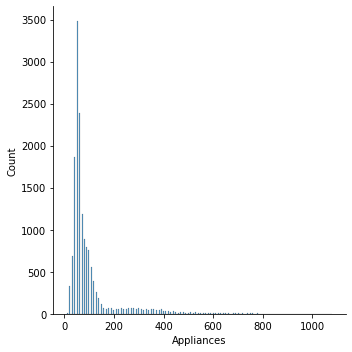

In [196]:
sns.displot(y_train['Appliances'])

The following variables, _train_byhour recorded the average dp of each hour. Thus, they have 24 rows of data. 

In [7]:
x_train_byhour = x_train.groupby(['hour']).mean()
y_train_byhour = y_train.groupby(['hour']).mean()

The following variable _train_ofEachHour recorded the full set information of each hour. Thus, _train_ofEachHour have 24 sets of data and each has 660 datapoints. 

In [8]:
x_train_ofEachHour = []
y_train_ofEachHour = []
hour = np.unique(x_train['hour'])
for i in hour:
    x_of_hour = x_train[x_train['hour'] == i]
    y_of_hour = y_train[y_train['hour'] == i]
    x_train_ofEachHour.append(x_of_hour)
    y_train_ofEachHour.append(y_of_hour)

len(x_train_ofEachHour)

24

In [31]:
x_test_ofEachHour = []
y_test_ofEachHour = []
hour = np.unique(x_test['hour'])
for i in hour:
    x_of_hour = x_test[x_test['hour'] == i]
    y_of_hour = y_test[y_test['hour'] == i]
    x_test_ofEachHour.append(x_of_hour)
    y_test_ofEachHour.append(y_of_hour)

#### Part a) 
Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy. (4x2.5=10 points) 

#### Lasso Regression

Standardizing the training dataset, and fit with ['Appliances'] column.

In [11]:
def mean_squared_error(y_true, y_pred, squared=True):
    """
    Mean squared error regression loss function.

    Parameters 
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,)
        Estimated target values.
    squared : bool, default=True
        If True returns MSE, if False returns RMSE.

    Returns 
    -------
    loss : float
        A non-negative floating point value (the best value is 0.0).
    """
    # Make sure inputs are numpy arrays.
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate array of errors for each instance.
    errors = np.average((y_true - y_pred) ** 2, axis=0)

    # Calculates square root of each error if squared=False.
    if not squared:
        errors = np.sqrt(errors)

    # Return average error across all instances.
    return np.average(errors)

def r2_score(y_true, y_pred):
    """
    R^2 regression score function.

        R^2 = 1 - SS_res / SS_tot

    where SS_res is the residual sum of squares and SS_tot is the total
    sum of squares.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,)
        Estimated target values.

    Returns
    -------
    score : float
        R^2 score.
    """
    # Residual sum of squares.
    numerator = ((y_true - y_pred) ** 2).sum(axis=0)

    # Total sum of squares.
    denominator = ((y_true - np.average(y_true, axis=0)) ** 2).sum(axis=0)

    # R^2.
    score = 1 - numerator / denominator

    return score 
    
    
class l1_regularization():
    """
    Add l1 regularization penalty to linear models.

    Regularization term:

        alpha * ||w||

    where w is the vector of feature weights and alpha is the hyperparameter
    controlling how much regularization is done to the model.

    Parameters
    ----------
    alpha : float, default=1.0
        Factor determining the amount of regularization to be performed on
        the model.

    Notes
    -----
    The bias term is not regularized and therefore should be omitted from the
    feature weights as input.  
    """
    def __init__(self, alpha=1.0):
        self.alpha = alpha 

    def __call__(self, w):
        "Calculate l1 regularization term."
        return self.alpha * np.linalg.norm(w, 1)

    def grad(self, w):
        """Calculate subgradient vector of l1 regularization penalty.
        
                      -1 if w_i < 0
            sign(w) =  0 if w_i = 0
                       1 if w_i > 0

        where w is the vector of feature weights.
        """
        subgradient = self.alpha * np.sign(w)
        
        # Insert 0 for bias term.
        return np.insert(subgradient, 0, 0, axis=0)


class Regression():
    """
    Class representing our base regression model.  
    
    Models relationship between a dependant scaler variable y and independent
    variables X by optimizing a cost function with batch gradient descent.

    Parameters
    ----------
    n_iter : float, default=1000
        Maximum number of iterations to be used by batch gradient descent.
    lr : float, default=1e-1
        Learning rate determining the size of steps in batch gradient descent.

    Attributes 
    ----------
    coef_ : array of shape (n_features,)
        Estimated coefficients for the regression problem.
    """
    def __init__(self, n_iter=1000, lr=1e-1):
        self.n_iter = n_iter 
        self.lr = lr 

    def fit(self, X, y):
        """
        Fit linear model with batch gradient descent.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data. Independent variables.
        y : array-like of shape (n_samples, 1)
            Target values. Dependent variable.

        Returns
        -------
        self : returns an instance of self.
        """
        # Insert X_0 = 1 for the bias term.
        X = np.insert(X, 0, 1, axis=1)

        # Store number of samples and features in variables.
        n_samples, n_features = np.shape(X)
        self.training_errors = []

        # Randomly intialize weights using glorot uniform intializer.
        limit = np.sqrt(2 / n_features)
        self.coef_ = np.random.uniform(-limit, limit, (n_features,))

        # Batch gradient descent for number iterations = n_iter.
        for _ in range(self.n_iter):
            y_preds = X.dot(self.coef_)

            # Penalty term if regularized (don't include bias term).
            regularization = self.regularization(self.coef_[1:])

            # Calculate mse + penalty term if regularized.
            cost_function = mean_squared_error(y, y_preds) + regularization
            self.training_errors.append(cost_function) 

            # Regularization term of gradients (don't include bias term).
            gradient_reg = self.regularization.grad(self.coef_[1:])

            # Gradients of loss function.
            gradients = (2/n_samples) * X.T.dot(y_preds - y)
            gradients = gradients + gradient_reg

            # Update the weights.
            self.coef_ -= self.lr * gradients 

        return self 

    def predict(self, X):
        """
        Estimate target values using the linear model.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Instances.

        Returns
        -------
        C : array of shape (n_samples,)
            Estimated targets per instance.
        """
        # Insert X_0 = 1 for the bias term.
        X = np.insert(X, 0, 1, axis=1)

        return X.dot(self.coef_)

    def score(self, X, y):
        """
        Calculate the coefficient of determination, R^2 of the predictions.

            R^2 = 1 - SS_res / SS_tot

        where SS_res is the residual sum of squares and SS_tot is the total
        sum of squares.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples for model to be scores against.
        y : array-like of shape (n_samples,).
            True values for test samples.

        Returns
        -------
        score : float
            R^2 calculated on test samples.
        """
        y_preds = self.predict(X)

        score = r2_score(y, y_preds)

        return score


class LassoRegression(Regression):
    """
    Class representing a linear regression model with l1 regularization.

    Minimizes the cost fuction:

        J(w) = MSE(w) + alpha * ||w||

    where w is the vector of feature weights and alpha is the hyperparameter
    controlling how much regularization is done to the model.

    Parameters
    ----------
    n_iter : float, default=1000
        Maximum number of iterations to be used by batch gradient descent.
    lr : float, default=1e-2
        Learning rate determining the size of steps in batch gradient descent.
    alpha : float, default=1.0
        Factor determining the amount of regularization to be performed on
        the model.

    Attributes
    ----------
    coef_ : array of shape (n_features,)
        Estimated coefficients for the regression problem.

    Notes
    -----
    This class is capable of being trained using batch gradient descent at
    current version.
    """
    def __init__(self, n_iter=1000, lr=1e-2, alpha=1.0):
        self.alpha = alpha
        self.regularization = l1_regularization(alpha=self.alpha)
        super(LassoRegression, self).__init__(n_iter=n_iter, lr=lr)

In [181]:
sc = StandardScaler()
x_train_tranformed = pd.DataFrame(sc.fit_transform(x_train))

lassoModel = LassoRegression(alpha=0.2, lr=0.118)
lassoModel.fit(x_train_tranformed.values, y_train['Appliances'].values) 

In [182]:
lasso_pred_train = lassoModel.predict(x_train_tranformed.values)

This model doesn't fit well to the dataset. The difference between Y_true and Y_pred are obvious from the figure below. When the target values are low, the prediction accuracy looks good, but when the target values grow, the prediction could not catch up with the change. Overall, the prediction values are much lower than the true values. 

I have tried multiple models with different alpha and learning rate, but the r2 values are always lower than 0.2, which indecates a very low linear correspondency. 

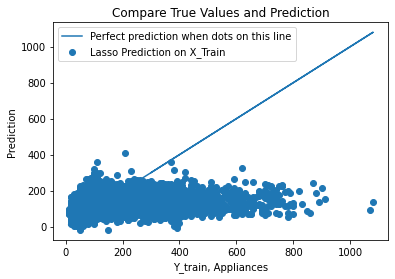

In [183]:
plt.scatter(
    y_train['Appliances'], lasso_pred_train,
    label='Lasso Prediction on X_Train'
    )
plt.plot(
    y_train['Appliances'],y_train['Appliances'],
    label='Perfect prediction when dots on this line'
    )
plt.legend(loc="upper left")
plt.title('Compare True Values and Prediction')
plt.xlabel('Y_train, Appliances')
plt.ylabel('Prediction')
plt.show()

In [100]:
pd.DataFrame({'Y':y_train['Appliances'],'lasso_pred_train':lasso_pred_train})

,Y,lasso_pred_train
0,60,124.149603
1,60,111.991091
2,50,108.774620
3,50,105.481057
4,60,108.559407
...,...,...
15783,80,68.132994
15784,80,66.370574
15785,50,63.666977
15786,70,71.092323


In [192]:
y_train_arr = np.array(y_train['Appliances'])
cost_lasso_train = (y_train_arr-lasso_pred_train)**2
rmse_lasso_train = np.sqrt(sum(cost_lasso_train)/len(cost_lasso_train))
r2_lasso_train = 1-sum(cost_lasso_train)/sum((y_train_arr-sum(y_train_arr)/len(y_train_arr))**2)

print(f"Lasso model on training dataset has rmse value: {rmse_lasso_train}")
print(f"Lasso model on training dataset has r2 value: {r2_lasso_train}")

Lasso model on training dataset has rmse value: 96.72557570052665
Lasso model on training dataset has r2 value: 0.15454053659725486


#### Decision Tree Regressor

In [13]:
#imports
from abc import ABC,abstractmethod
import numpy as np

#class to control tree node
class Node:
    #initializer
    def __init__(self):
        self.__Bs    = None
        self.__Bf    = None
        self.__left  = None
        self.__right = None
        self.leafv   = None

    #set the split,feature parameters for this node
    def set_params(self,Bs,Bf):
        self.__Bs = Bs
        self.__Bf = Bf
        
    #get the split,feature parameters for this node
    def get_params(self):
        return(self.__Bs,self.__Bf)    
        
    #set the left/right children nodes for this current node
    def set_children(self,left,right):
        self.__left  = left
        self.__right = right
        
    #get the left child node
    def get_left_node(self):
        return(self.__left)
    
    #get the right child node
    def get_right_node(self):
        return(self.__right)

#base class to encompass the decision tree algorithm
class DecisionTree(ABC):
    #initializer
    def __init__(self,max_depth=None,min_samples_split=2):
        self.tree              = None
        self.max_depth         = max_depth
        self.min_samples_split = min_samples_split
        
    #protected function to define the impurity
    @abstractmethod
    def _impurity(self,D):
         pass
        
    #protected function to compute the value at a leaf node
    @abstractmethod
    def _leaf_value(self,D):
         pass
        
    #private recursive function to grow the tree during training
    def __grow(self,node,D,level):       
        #are we in a leaf node? let's do some check...
        depth = (self.max_depth is None) or (self.max_depth >= (level+1))
        msamp = (self.min_samples_split <= D.shape[0])
        n_cls = np.unique(D[:,-1]).shape[0] != 1
        
        #not a leaf node
        if depth and msamp and n_cls:
        
            #initialize the function parameters
            ip_node = None
            feature = None
            split   = None
            left_D  = None
            right_D = None
            #determine the possible features on which we can split
            features = np.random.choice([i for i in range(D.shape[1]-1)],size=int(np.sqrt(D.shape[1]-1)),replace=False)
            #iterrate through the possible feature/split combinations
            for f in features:
                for s in np.unique(D[:,f]):
                    #for the current (f,s) combination, split the dataset
                    D_l = D[D[:,f]<=s]
                    D_r = D[D[:,f]>s]
                    #ensure we have non-empty arrays, otherwise treat as a leaf node
                    if D_l.size and D_r.size:
                        #calculate the impurity
                        ip  = (D_l.shape[0]/D.shape[0])*self._impurity(D_l) + (D_r.shape[0]/D.shape[0])*self._impurity(D_r)
                        #now update the impurity and choice of (f,s)
                        if (ip_node is None) or (ip < ip_node):
                            ip_node = ip
                            feature = f
                            split   = s
                            left_D  = D_l
                            right_D = D_r    
            #check if valid parameters were found? If not, treat this as a leaf node & return
            if (split is None) or (feature is None) or (left_D is None) or (right_D is None):
                node.leafv = self._leaf_value(D)
                return
            #set the current node's parameters
            node.set_params(split,feature)
            #declare child nodes
            left_node  = Node()
            right_node = Node()
            node.set_children(left_node,right_node)
            #investigate child nodes
            self.__grow(node.get_left_node(),left_D,level+1)
            self.__grow(node.get_right_node(),right_D,level+1)
                        
        #is a leaf node
        else:
            
            #set the node value & return
            node.leafv = self._leaf_value(D)
            return
     
    #private recursive function to traverse the (trained) tree
    def __traverse(self,node,Xrow):
        #check if we're in a leaf node?
        if node.leafv is None:
            #get parameters at the node
            (s,f) = node.get_params()
            #decide to go left or right?
            if (Xrow[f] <= s):
                return(self.__traverse(node.get_left_node(),Xrow))
            else:
                return(self.__traverse(node.get_right_node(),Xrow))
        else:
            #return the leaf value
            return(node.leafv)
    
    #train the tree model
    def fit(self,Xin,Yin):
        #prepare the input data
        D = np.concatenate((Xin,Yin.reshape(-1,1)),axis=1)
        #set the root node of the tree
        self.tree = Node()
        #build the tree
        self.__grow(self.tree,D,1)
        
    #make predictions from the trained tree
    def predict(self,Xin):
        #iterrate through the rows of Xin
        p = []
        for r in range(Xin.shape[0]):
            p.append(self.__traverse(self.tree,Xin[r,:]))
        #return predictions
        return(np.array(p).flatten())


class DecisionTreeRegressor(DecisionTree):
    #initializer
    def __init__(self,max_depth=None,min_samples_split=2,loss='mse'):
        super().__init__(max_depth,min_samples_split)
        self.loss              = loss   
    
    #private function to define the mean squared error
    def __mse(self,D):
        #compute the mean target for the node
        y_m = np.mean(D[:,-1])
        #compute the mean squared error wrt the mean
        E = np.sum((D[:,-1] - y_m)**2)/D.shape[0]
        #return mse
        return(E)
    
    #private function to define the mean absolute error
    def __mae(self,D):
        #compute the mean target for the node
        y_m = np.mean(D[:,-1])
        #compute the mean absolute error wrt the mean
        E = np.sum(np.abs(D[:,-1] - y_m))/D.shape[0]
        #return mae
        return(E)
    
    #protected function to define the impurity
    def _impurity(self,D):
        #use the selected loss function to calculate the node impurity
        ip = None
        if self.loss == 'mse':
            ip = self.__mse(D)
        elif self.loss == 'mae':
            ip = self.__mae(D)
        #return results
        return(ip)
    
    #protected function to compute the value at a leaf node
    def _leaf_value(self,D):
         return(np.mean(D[:,-1]))
     
    #public function to return model parameters
    def get_params(self,deep=False):
        return{'max_depth':self.max_depth,
               'min_samples_split':self.min_samples_split,
               'loss':self.loss}

In [267]:
dtrg = DecisionTreeRegressor(max_depth=4,min_samples_split=3)

In [268]:
dtrg.fit(x_train, np.array(y_train['Appliances']).reshape(-1,1))

In [123]:
dtrg_pred_train = dtrg.predict(x_train.values)

Similar to lasso, decision tree regressor does not give a good prediction on the training dataset prediction. Decision tree regressor works fine on the cases where Y is comparably low, but fail to predict cases with high Y values. The overall prediction are also discrete, unlike the Y true values to be continuous without any levels. 

The R2 is 0.11, lower than lasso model, and it means worse linear correspondency between Y true values and Y prediction values. 

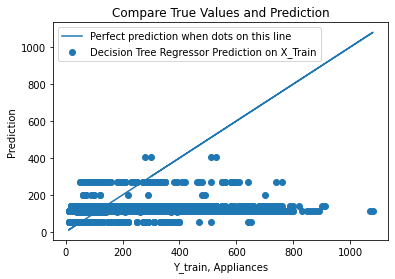

In [195]:
plt.scatter(
    y_train['Appliances'], dtrg_pred_train,
    label='Decision Tree Regressor Prediction on X_Train'
    )
plt.plot(
    y_train['Appliances'],y_train['Appliances'],
    label='Perfect prediction when dots on this line'
    )
plt.legend(loc="upper left")
plt.title('Compare True Values and Prediction')
plt.xlabel('Y_train, Appliances')
plt.ylabel('Prediction')
plt.show()

In [194]:
y_train_arr = np.array(y_train['Appliances'])
cost_dtrg_train = (y_train_arr-dtrg_pred_train)**2
rmse_dtrg_train = np.sqrt(sum(cost_dtrg_train)/len(cost_dtrg_train))
r2_dtrg_train = 1-sum(cost_dtrg_train)/sum((y_train_arr-sum(y_train_arr)/len(y_train_arr))**2)

print(
    f"Decision Tree Regressor on training dataset has rmse value: "
    f"{rmse_dtrg_train}"
    )
print(
    f"Decision Tree Regressor on training dataset has r2 value: "
    f"{r2_dtrg_train}"
    )

Decision Tree Regressor on training dataset has rmse value: 99.04303806792086
Decision Tree Regressor on training dataset has r2 value: 0.11354223186009116


In [124]:
pd.DataFrame({'Y':y_train['Appliances'],'dtrg_pred_train':dtrg_pred_train})

,Y,dtrg_pred_train
0,60,138.446602
1,60,138.446602
2,50,138.446602
3,50,138.446602
4,60,138.446602
...,...,...
15783,80,53.080722
15784,80,53.080722
15785,50,53.080722
15786,70,113.088979


#### Random Forest

In [20]:
from abc import ABC,abstractmethod
from sklearn.base import clone
    
class RandomForest(ABC):
    #initializer
    def __init__(self,n_trees=100):
        self.n_trees = n_trees
        self.trees   = []
        
    #private function to make bootstrap samples
    def __make_bootstraps(self,data):
        #initialize output dictionary & unique value count
        dc   = {}
        unip = 0
        #get sample size
        b_size = data.shape[0]
        #get list of row indexes
        idx = [i for i in range(b_size)]
        #loop through the required number of bootstraps
        for b in range(self.n_trees):
            #obtain boostrap samples with replacement
            sidx   = np.random.choice(idx,replace=True,size=b_size)
            b_samp = data[sidx,:]
            #compute number of unique values contained in the bootstrap sample
            unip  += len(set(sidx))
            #obtain out-of-bag samples for the current b
            oidx   = list(set(idx) - set(sidx))
            o_samp = np.array([])
            if oidx:
                o_samp = data[oidx,:]
            #store results
            dc['boot_'+str(b)] = {'boot':b_samp,'test':o_samp}
        #return the bootstrap results
        return(dc)
  
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees}

    #protected function to obtain the right decision tree
    @abstractmethod
    def _make_tree_model(self):
        pass
    
    #protected function to train the ensemble
    def _train(self,X_train,y_train):
        #package the input data
        training_data = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        #make bootstrap samples
        dcBoot = self.__make_bootstraps(training_data)
        #iterate through each bootstrap sample & fit a model ##
        tree_m = self._make_tree_model()
        dcOob    = {}
        for b in dcBoot:
            #make a clone of the model
            model = clone(tree_m)
            #fit a decision tree model to the current sample
            model.fit(dcBoot[b]['boot'][:,:-1],dcBoot[b]['boot'][:,-1].reshape(-1, 1))
            #append the fitted model
            self.trees.append(model)
            #store the out-of-bag test set for the current bootstrap
            if dcBoot[b]['test'].size:
                dcOob[b] = dcBoot[b]['test']
            else:
                dcOob[b] = np.array([])
        #return the oob data set
        return(dcOob)
       
    #protected function to predict from the ensemble
    def _predict(self,X):
        #check we've fit the ensemble
        if not self.trees:
            print('You must train the ensemble before making predictions!')
            return(None)
        #loop through each fitted model
        predictions = []
        for m in self.trees:
            #make predictions on the input X
            yp = m.predict(X)
            #append predictions to storage list
            predictions.append(yp.reshape(-1,1))
        #compute the ensemble prediction
        ypred = np.mean(np.concatenate(predictions,axis=1),axis=1)
        #return the prediction
        return(ypred)

#class for random forest regressor
class RandomForestRegressor(RandomForest):
    #initializer
    def __init__(self,n_trees=100,max_depth=None,min_samples_split=2,loss='mse'):
        super().__init__(n_trees)
        self.max_depth             = max_depth
        self.min_samples_split     = min_samples_split
        self.loss                  = loss
        
    #protected function to obtain the right decision tree
    def _make_tree_model(self):
        return(DecisionTreeRegressor(self.max_depth,self.min_samples_split,self.loss))
    
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees,
                'max_depth':self.max_depth,
                'min_samples_split':self.min_samples_split,
                'loss':self.loss}
    
    #train the ensemble
    def fit(self,X_train,y_train):
        #call the protected training method
        dcOob = self._train(X_train,y_train)
            
    #predict from the ensemble
    def predict(self,X):
        #call the protected prediction method
        ypred = self._predict(X)
        #return the results
        return(ypred)  

Separate the original dataset into 24 pieces by the hour time. Train 24 models and each one will be corresponding to one hour, and predict the values based on the hour recorded. 

In [50]:
rfrList = [RandomForestRegressor(max_depth=3) for i in range(24)]
for i in range(24):
    rfrList[i].fit(x_train_ofEachHour[i].drop(['hour'],axis=1),np.array(y_train_ofEachHour[i]['Appliances']).reshape(-1,1))

In [130]:
rfr_pred = []
for i in range(24):
    rfr_pred.append(rfrList[i].predict(np.array(x_train_ofEachHour[i].drop(['hour'],axis=1))))

Random forest regressor works better than the previous 2 models. The results are continuous, and it offers better prediction on the higher Y value cases. The cost of the results is lower than lasso and decision tree regressor. The RMSE value is lower than those of the 2 models. 

However, the R2 0.334 is still pretty low. The prediction on the testing dataset could fail on the higher Y value cases. 

In [226]:
# Combine 24 models and prediction result to evaluate the whole prediction.
y_true_rfr_train = []
y_pred_rfr_train = []
for i in range(24):
    y_true_rfr_train = np.concatenate(
        (y_true_rfr_train,y_train_ofEachHour[i]['Appliances']),axis=0
        )
    y_pred_rfr_train = np.concatenate(
        (y_pred_rfr_train,rfr_pred[i]),axis=0
        )

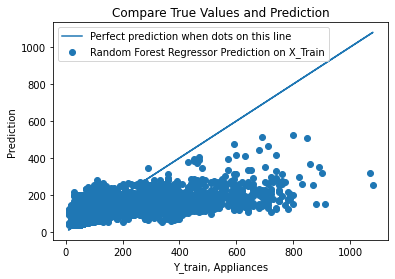

In [225]:
plt.scatter(
    y_true_rfr_train, y_pred_rfr_train,
    label='Random Forest Regressor Prediction on X_Train'
    )
plt.plot(
    y_true_rfr_train,y_true_rfr_train,
    label='Perfect prediction when dots on this line'
    )
plt.legend(loc="upper left")
plt.title('Compare True Values and Prediction')
plt.xlabel('Y_train, Appliances')
plt.ylabel('Prediction')
plt.show()

In [223]:
# Calculate cost for the whole dataset (24 hours)
cost_rfr_train = []
for i in range(24):
    cost_rfr = sum(
        y_train_ofEachHour[i]['Appliances']-rfr_pred[i]
        )**2
    cost_rfr_train.append(cost_rfr)

cost_rfr_train = (y_true_rfr_train-y_pred_rfr_train)**2
rmse_rfr_train = np.sqrt(sum(cost_rfr_train)/len(cost_rfr_train))
r2_rfr_train = 1-sum(cost_rfr_train)/sum((y_true_rfr_train-sum(y_true_rfr_train)/len(y_true_rfr_train))**2)

print(
    f"Random Forest Regressor on training dataset has rmse value: "
    f"{rmse_rfr_train}"
    )
print(
    f"Random Forest Regressor on training dataset has r2 value: "
    f"{r2_rfr_train}"
    )

Random Forest Regressor on training dataset has rmse value: 85.81385498481211
Random Forest Regressor on training dataset has r2 value: 0.33453538545590733


#### Gradient Boost

In [25]:
from typing import Dict, Any, List

class GradientBoostTreeRegressor(object):
    #initializer
    def __init__(self,  n_elements : int = 100, learning_rate : float = 0.01) -> None:
        self.weak_learner  = DecisionTreeRegressor(max_depth=5)
        self.n_elements    = n_elements
        self.learning_rate = learning_rate
        self.f             = []
        self.residuals     = []
        
    #destructor
    def __del__(self) -> None:
        del self.weak_learner
        del self.n_elements
        del self.learning_rate
        del self.f
        del self.residuals
    
    #public function to return model parameters
    def get_params(self, deep : bool = False) -> Dict:
        return {'weak_learner':self.weak_learner,'n_elements':self.n_elements,'learning_rate':self.learning_rate}
    
    #public function to train the ensemble
    def fit(self, X_train : np.array, y_train : np.array) -> None:
        #initialize residuals
        r = np.copy(y_train).astype(float)
        #loop through the specified number of iterations in the ensemble
        for _ in range(self.n_elements):
            #make a copy of the weak learner
            model = clone(self.weak_learner)
            #fit the weak learner on the current dataset
            model.fit(X_train,r)
            #update the residuals
            r -= self.learning_rate*model.predict(X_train)
            #append resulting model
            self.f.append(model)
            #append current mean residual
            self.residuals.append(np.mean(r))    
            
    #public function to return residuals
    def get_residuals(self) -> List:
        return(self.residuals)
    
    #public function to generate predictions
    def predict(self, X_test : np.array) -> np.array:
        #initialize output
        y_pred = np.zeros((X_test.shape[0]))
        #traverse ensemble to generate predictions
        for model in self.f:
            y_pred += self.learning_rate*model.predict(X_test)
        #return predictions
        return(y_pred)

In [53]:
gradBoostModelList = [GradientBoostTreeRegressor(n_elements=1000, learning_rate=1.2e-3) for i in range(24)]

In [141]:
for i in range(24):
    gradBoostModelList[i].fit(np.array(x_train_ofEachHour[i].drop(['hour'],axis=1)),np.array(y_train_ofEachHour[i]['Appliances']))

In [65]:
import concurrent

gradBoostModelList = [GradientBoostTreeRegressor(n_elements=1000, learning_rate=1.2e-3) for i in range(24)]

def gradient_boost_fit(i):
    print('Iteration = ', i)
    gradBoostModelList[i].fit(np.array(x_train_ofEachHour[i].drop(['hour'],axis=1)),np.array(y_train_ofEachHour[i]['Appliances']))
    print('Done = ', i)

# with concurrent.futures.ThreadPoolExecutor(24) as executor:
#     executor.map(gradient_boost_fit, range(24))

In [229]:
grad_pred = []
for i in range(24):
    grad_pred.append(gradBoostModelList[i].predict(np.array(x_train_ofEachHour[i].drop(['hour'],axis=1))))

The gradient boost tree regressor works better than the previous 3 models with higher R2 score and lower RMSE. The reason that gradient boost tree regressor has better performance on all kinds of cases can be the weighted change on the high cost prediction. After each fitting and prediction of a single model, gradient boost focus on the high difference case.

In [231]:
# Combine 24 models and prediction result to evaluate the whole prediction.
y_true_grad_train = []
y_pred_grad_train = []
for i in range(24):
    y_true_grad_train = np.concatenate(
        (y_true_grad_train,y_train_ofEachHour[i]['Appliances']),axis=0
        )
    y_pred_grad_train = np.concatenate(
        (y_pred_grad_train,grad_pred[i]),axis=0
        )

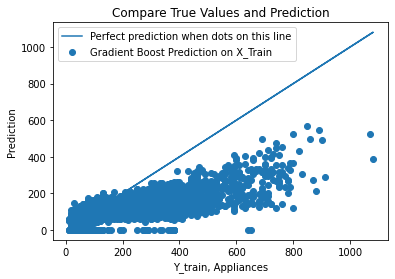

In [233]:
plt.scatter(
    y_true_grad_train, y_pred_grad_train,
    label='Gradient Boost Prediction on X_Train'
    )
plt.plot(
    y_true_grad_train,y_true_grad_train,
    label='Perfect prediction when dots on this line'
    )
plt.legend(loc="upper left")
plt.title('Compare True Values and Prediction')
plt.xlabel('Y_train, Appliances')
plt.ylabel('Prediction')
plt.show()

In [241]:
# Calculate cost for the whole dataset (24 hours)
cost_grad_train = []
for i in range(24):
    cost_grad = sum(
        y_train_ofEachHour[i]['Appliances']-grad_pred[i]
        )**2
    cost_grad_train.append(cost_grad)

cost_grad_train = (y_true_grad_train-y_pred_grad_train)**2
rmse_grad_train = np.sqrt(sum(cost_grad_train)/len(cost_grad_train))
r2_grad_train = 1-sum(cost_grad_train)/sum((y_true_grad_train-sum(y_true_grad_train)/len(y_true_grad_train))**2)

print(
    f"Gradient Boost Regressor on training dataset has rmse value: "
    f"{rmse_grad_train}"
    )
print(
    f"Gradient Boost Regressor on training dataset has r2 value: "
    f"{r2_grad_train}"
    )

Gradient Boost Regressor on training dataset has rmse value: 83.13516380843308
Gradient Boost Regressor on training dataset has r2 value: 0.3754321041348775


#### Part b) 
Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model. (4x2.5=10 points)

#### Lasso on testing dataset

Lasso works worse on the testing dataset. R2 score for testing dataset is 0.06, which indicates almost no linear correspondency is found between the prediction and the true values. RMSE values did not grow too large because the total number of most wrongly predicted cases is not too large. 

In [234]:
# Lasso prediction requires standardization
x_test_tranformed = pd.DataFrame(sc.fit_transform(x_test))
lasso_pred_test = lassoModel.predict(x_test_tranformed.values)

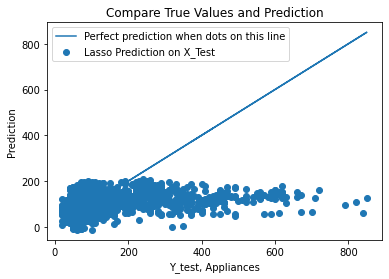

In [235]:
plt.scatter(
    y_test['Appliances'], lasso_pred_test,
    label='Lasso Prediction on X_Test'
    )
plt.plot(
    y_test['Appliances'],y_test['Appliances'],
    label='Perfect prediction when dots on this line'
    )
plt.legend(loc="upper left")
plt.title('Compare True Values and Prediction')
plt.xlabel('Y_test, Appliances')
plt.ylabel('Prediction')
plt.show()

In [236]:
y_test_arr = np.array(y_test['Appliances'])
cost_lasso_test = (y_test_arr-lasso_pred_test)**2
rmse_lasso_test = np.sqrt(sum(cost_lasso_test)/len(cost_lasso_test))
r2_lasso_test = 1-sum(cost_lasso_test)/sum((y_test_arr-sum(y_test_arr)/len(y_test_arr))**2)

print(f"Lasso model on testing dataset has rmse value: {rmse_lasso_test}")
print(f"Lasso model on testing dataset has r2 value: {r2_lasso_test}")

Lasso model on testing dataset has rmse value: 87.91137259151398
Lasso model on testing dataset has r2 value: 0.06751973578780768


#### Decision Tree Regressor on testing dataset

Decision tree regressor also results in negative R2 score because no linear relationships were found in the prediction and the true values. 

The prediction result only has 4 different values, which is far different than the real continuous cases. This will also decrease the reliability of the prediction. 

Since the training dataset is not balanced, the prediction only works a little bit better on the most common cases. Thus, decision tree regressor has better prediction on the lower Y value cases than the higher Y value cases. 

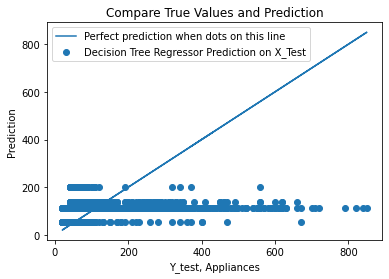

In [244]:
# Prediction
dtrg_pred_test = dtrg.predict(x_test.values)

# Plot
plt.scatter(
    y_test['Appliances'], dtrg_pred_test,
    label='Decision Tree Regressor Prediction on X_Test'
    )
plt.plot(
    y_test['Appliances'],y_test['Appliances'],
    label='Perfect prediction when dots on this line'
    )
plt.legend(loc="upper left")
plt.title('Compare True Values and Prediction')
plt.xlabel('Y_test, Appliances')
plt.ylabel('Prediction')
plt.show()

In [254]:
# Only 4 different values are predicted with this model.
np.unique(dtrg_pred_test).shape

(4,)

In [245]:
y_test_arr = np.array(y_test['Appliances'])
cost_dtrg_test = (y_test_arr-dtrg_pred_test)**2
rmse_dtrg_test = np.sqrt(sum(cost_dtrg_test)/len(cost_dtrg_test))
r2_dtrg_test = 1-sum(cost_dtrg_test)/sum((y_test_arr-sum(y_test_arr)/len(y_test_arr))**2)

print(
    f"Decision Tree Regressor on training dataset has rmse value: "
    f"{rmse_dtrg_test}"
    )
print(
    f"Decision Tree Regressor on training dataset has r2 value: "
    f"{r2_dtrg_test}"
    )

Decision Tree Regressor on training dataset has rmse value: 94.9070140603665
Decision Tree Regressor on training dataset has r2 value: -0.08679128441546213


#### Random Forest Regressor on testing dataset

Random forest regressor has similar issue: negative R2. It means the model cannot fit the data properly. Comparing it to lasso and decision tree regression prediction, we can found it has more noise and more unstable prediction on all kinds of cases. The prediction on the low Y value cases should be pointed out because it has higher prediction than the real high Y value cases which exacerbates the negativity on R2 score. The prediction also inform us that even though later we have the sample test data points, we can not even tell if the Y value should be high or low. We can conclude that this model has both large bias and large variance, so the result would not be correct. 

In [246]:
rfr_pred_test = []
for i in range(24):
    rfr_pred_test.append(
        rfrList[i].predict(
            np.array(x_test_ofEachHour[i].drop(['hour'],axis=1))
        )
    )

# Combine 24 models and prediction result to evaluate the whole prediction.
y_true_rfr_test = []
y_pred_rfr_test = []
for i in range(24):
    y_true_rfr_test = np.concatenate(
        (y_true_rfr_test,y_test_ofEachHour[i]['Appliances']),axis=0
        )
    y_pred_rfr_test = np.concatenate(
        (y_pred_rfr_test,rfr_pred_test[i]),axis=0
        )

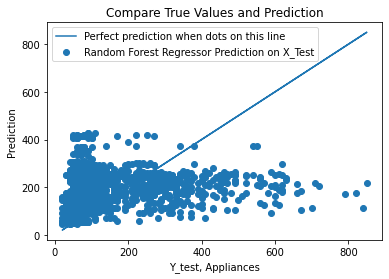

In [247]:
plt.scatter(
    y_true_rfr_test, y_pred_rfr_test,
    label='Random Forest Regressor Prediction on X_Test'
    )
plt.plot(
    y_true_rfr_test,y_true_rfr_test,
    label='Perfect prediction when dots on this line'
    )
plt.legend(loc="upper left")
plt.title('Compare True Values and Prediction')
plt.xlabel('Y_test, Appliances')
plt.ylabel('Prediction')
plt.show()

In [248]:
# Calculate cost for the whole dataset (24 hours)
cost_rfr_test = []
for i in range(24):
    cost_rfr = sum(
        y_train_ofEachHour[i]['Appliances']-rfr_pred[i]
        )**2
    cost_rfr_test.append(cost_rfr)

cost_rfr_test = (y_true_rfr_test-y_pred_rfr_test)**2
rmse_rfr_test = np.sqrt(sum(cost_rfr_test)/len(cost_rfr_test))
r2_rfr_test = 1-sum(cost_rfr_test)/sum((y_true_rfr_test-sum(y_true_rfr_test)/len(y_true_rfr_test))**2)

print(
    f"Random Forest Regressor on training dataset has rmse value: "
    f"{rmse_rfr_test}"
    )
print(
    f"Random Forest Regressor on training dataset has r2 value: "
    f"{r2_rfr_test}"
    )

Random Forest Regressor on training dataset has rmse value: 112.27503649854731
Random Forest Regressor on training dataset has r2 value: -0.5209535008218398


#### Gradient Boost Regressor on testing dataset

Gradient boost regressor shows worst prediction on the testing dataset. The R2 score is negative and this means almost no, but slight negative relationships were found between the prediction and the true values.

Overall, the prediction values has much greater noise than gradient boost regressor did on the training dataset. Some of the low Y value cases are predicted with high Y prediction values. Meanwhile, the real high Y value cases are not found correspondently. 

The result can indicate an overfit to the model.

In [237]:
grad_pred_test = []
for i in range(24):
    grad_pred_test.append(gradBoostModelList[i].predict(np.array(x_test_ofEachHour[i].drop(['hour'],axis=1))))

In [238]:
# Combine 24 models and prediction result to evaluate the whole prediction.
y_true_grad_test = []
y_pred_grad_test = []
for i in range(24):
    y_true_grad_test = np.concatenate(
        (y_true_grad_test,y_test_ofEachHour[i]['Appliances']),axis=0
        )
    y_pred_grad_test = np.concatenate(
        (y_pred_grad_test,grad_pred_test[i]),axis=0
        )

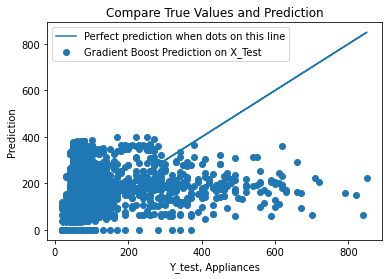

In [239]:
plt.scatter(
    y_true_grad_test, y_pred_grad_test,
    label='Gradient Boost Prediction on X_Test'
    )
plt.plot(
    y_true_grad_test,y_true_grad_test,
    label='Perfect prediction when dots on this line'
    )
plt.legend(loc="upper left")
plt.title('Compare True Values and Prediction')
plt.xlabel('Y_test, Appliances')
plt.ylabel('Prediction')
plt.show()

In [242]:
# Calculate cost for the whole dataset (24 hours)
cost_grad_test = []
for i in range(24):
    cost_grad = sum(
        y_test_ofEachHour[i]['Appliances']-grad_pred_test[i]
        )**2
    cost_grad_test.append(cost_grad)

cost_grad_test = (y_true_grad_test-y_pred_grad_test)**2
rmse_grad_test = np.sqrt(sum(cost_grad_test)/len(cost_grad_test))
r2_grad_test = 1-sum(cost_grad_test)/sum((y_true_grad_test-sum(y_true_grad_test)/len(y_true_grad_test))**2)

print(
    f"Gradient Boost Regressor on training dataset has rmse value: "
    f"{rmse_grad_test}"
    )
print(
    f"Gradient Boost Regressor on training dataset has r2 value: "
    f"{r2_grad_test}"
    )

Gradient Boost Regressor on training dataset has rmse value: 116.29382243127185
Gradient Boost Regressor on training dataset has r2 value: -0.6317845541110352


#### Part c) 
Do you see any bias and variance issues? How do you interpret each model output? (4x2.5=10 points)

Yes, bias and variance issue exist. 

All the models did not provide a good R2 score on the training dataset. All R2 scores of training dataset are lower than 0.5. Usually we expect the R2 score to be higher than 0.7. That means they could not fit the data well and they have high bias.

Lasso and decision tree regressor have slight variance issue, but the random forest regressor and gradient boost regressor have serious variance issue. The latter two models indicate hugh cost on the similar cases. When the real values are alike, the prediction can varies a lot. 

In a summary, Lasso and decision tree regressor has higher bias and lower variance than the other two models.

#### Part d) 
Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence. (5 points)

Following part checks lasso model's coefficients. Larger coefficients (absolute values) indicate high importance and high relativity. The figure below show that RH1, T3, and RH2 have most impact on the prediction, and thus they are the most important features in lasso regression. 

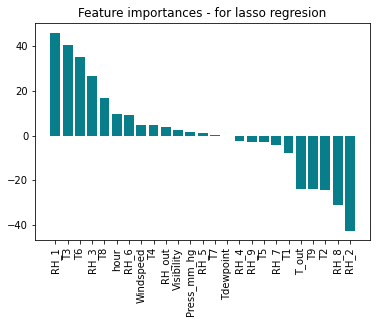

In [252]:
# Lasso

dfX = pd.DataFrame(x_all,columns=x_all.columns)
lassoImportantfeatures = pd.DataFrame(data={'feature': dfX.columns})
lassoImportantfeatures["importance"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

plt.bar(x=lassoImportantfeatures['feature'], height=lassoImportantfeatures['importance'], color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.show()

After considering all the tree information from the 24 decision tree regressor, T3 would be the most important feature because it appears 4 out of 24 times.  +root explain

As for random forest regressor and gradient boost regressor, the most important feature can be different because the original dataset was splitted into 24 pieces, and each piece can have different important features. Those important features are listed below. Regarding the overall situaltion, the most important features are T3, T8, T9, Tdewpoint, and mm Hg press. 


In [277]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        # for leaf node
        self.value = value

class decisiontreeregressor():
    
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
        #features
        self.features_used = []
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # generate feature list
                self.features_used.append([self.features[best_split["feature_index"]],curr_depth])
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(round(tree.value,4))

        else:
            print("|-",self.features[tree.feature_index], "<=", tree.threshold, ":Variance Red", round(tree.var_red,4))
            # print("%sleft-->" % (indent), end="")
            # self.print_tree(tree.left, indent + indent)
            # print("%sright-->" % (indent), end="")
            # self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.features = X.columns
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def get_features(self):
        return self.features_used 

In [278]:
dtrg2List = [decisiontreeregressor(max_depth=4,min_samples_split=3) for i in range(24)]
for i in range(24):
    dtrg2List[i].fit(
        x_train_ofEachHour[i].drop(['hour'],axis=1),
        np.array(y_train_ofEachHour[i].drop(['hour'],axis=1)['Appliances']).reshape(-1,1)
        )

In [279]:
# Print most important feature of each data piece. 
for i in range(24):
    dtrg2List[i].print_tree()

|- Press_mm_hg <= 737.4 :Variance Red 37.1976
|- Press_mm_hg <= 737.766666666667 :Variance Red 92.1587
|- T5 <= 19.205 :Variance Red 16.0677
|- T8 <= 22.4877777777778 :Variance Red 19.0838
|- T9 <= 16.89 :Variance Red 18.9861
|- T9 <= 20.9266666666667 :Variance Red 152.9029
|- T4 <= 21.79 :Variance Red 338.7937
|- RH_2 <= 47.4 :Variance Red 582.7755
|- T7 <= 15.6 :Variance Red 2438.9774
|- RH_3 <= 46.5 :Variance Red 1039.3146
|- RH_1 <= 33.6 :Variance Red 1341.9719
|- T3 <= 23.5 :Variance Red 1099.7301
|- T1 <= 22.6 :Variance Red 1140.7245
|- RH_8 <= 52.1755555555556 :Variance Red 1047.6132
|- T3 <= 23.6333333333333 :Variance Red 931.2354
|- T3 <= 23.5 :Variance Red 1959.9372
|- T3 <= 23.39 :Variance Red 2793.9442
|- T3 <= 23.1 :Variance Red 2817.7941
|- T8 <= 18.79 :Variance Red 1437.0439
|- T6 <= 1.32333333333333 :Variance Red 892.6499
|- T_out <= -2.5 :Variance Red 2573.5334
|- Tdewpoint <= -5.4 :Variance Red 662.5342
|- RH_7 <= 36.59 :Variance Red 200.5076
|- RH_1 <= 45.59 :Varianc